В этом ноутбуке начинаю с `1d` модели c одной жидкостью
## Ещё раз напишу теорию
Вообще тут всего 2 больших закона: сохранения массы и Дарси

$$q = \alpha A \frac{k}{\mu}\frac{\partial p}{\partial x}$$ где $A$ - прощадь, $\alpha$ - коэффициент перевода единиц
$$\frac{\partial}{\partial t} (\phi \rho ) = - \nabla (\rho v)$$

Скорость течения связана с расходом: $V = \frac{q}{A} $.
Получается что 
$$\frac{\partial}{\partial x}\big(\rho \frac{k_x}{\mu} \frac{\partial p}{\partial x}\big)
+ \frac{\partial}{\partial y}\big(\rho \frac{k_y}{\mu} \frac{\partial p}{\partial y}\big)
+ \frac{\partial}{\partial z}\big(\rho \frac{k_z}{\mu} \frac{\partial p}{\partial z}\big)
=\frac{1}{\alpha}\frac{\partial}{\partial t}(\phi \rho)
$$

Сразу, на будующее, добавим в это уравнение возможность добавить $q$ от шахты.

$$\frac{\partial}{\partial x}\big(\rho \frac{k_x A_x}{\mu B} \frac{\partial p}{\partial x}\big) \Delta x
+ \frac{\partial}{\partial y}\big(\rho \frac{k_y A_y}{\mu B} \frac{\partial p}{\partial y}\big) \Delta y
+ \frac{\partial}{\partial z}\big(\rho \frac{k_z A_z}{\mu B} \frac{\partial p}{\partial z}\big) \Delta z
+ q
=\frac{V_b}{\alpha}\frac{\partial}{\partial t}\big(\frac{\phi}{B}\big)
$$ где $V_b$ - объём ячейки

Для слабо сжимаемой жидкости $\frac{\partial}{\partial t}\big(\frac{\phi}{B}\big) = \phi c \frac{\partial p}{\partial t}$
где $c$ - сжимаемость

Итого:
$$\frac{\partial}{\partial x}\big(\frac{k_x A_x}{\mu B} \frac{\partial p}{\partial x}\big) \Delta x
+ \frac{\partial}{\partial y}\big(\frac{k_y A_y}{\mu B} \frac{\partial p}{\partial y}\big) \Delta y
+ \frac{\partial}{\partial z}\big(\frac{k_z A_z}{\mu B} \frac{\partial p}{\partial z}\big) \Delta z
+ q
=\frac{V_b \phi c }{\alpha}\frac{\partial p}{\partial t}
$$

$$\frac{\partial}{\partial x}\big(\frac{ k A}{\mu B} \frac{\partial p}{\partial x}\big) \Delta x + q_i
= \frac{\partial}{\partial x}\big(\frac{ k_{i+\frac{1}{2}} A}{\mu B} \frac{p_{i+1} - p_{i}}{\Delta x}\big) \Delta x + q_i=
\\
\Big(\frac{k_{i+\frac{1}{2}} A}{\mu B} \frac{p_{i+1} - p_{i}}{\Delta x}
-\frac{ k_{i-\frac{1}{2}} A}{\mu B} \frac{p_{i} - p_{i-1}}{\Delta x}\Big) + q_i
= \frac{p^{n+1}_i - p^{n}_i}{\Delta t} \frac{V_b \phi c}{\alpha}
$$
Перепишем приближение лапласиана в таком порядке, чтобы сразу стало понятно как писать матрицу для обновления давления

$$\frac{1}{\mu B }\Big(\frac{k_{i-\frac{1}{2}} A_{i-\frac{1}{2}}}{\Delta x_{i-\frac{1}{2}}}p_{i-1}
- \big( \frac{k_{i+\frac{1}{2}} A_{i+\frac{1}{2}}}{\Delta x_{i+\frac{1}{2}}} + \frac{k_{i-\frac{1}{2}} A_{i-\frac{1}{2}}}{\Delta x_{i-\frac{1}{2}}}\big)p_{i}
+\frac{k_{i+\frac{1}{2}} A_{i+\frac{1}{2}}}{\Delta x_{i+\frac{1}{2}}}p_{i+1}\Big) + q_i
= \frac{p^{n+1}_i - p^{n}_i}{\Delta t} \frac{V_b \phi c}{\alpha}
$$

В 1D случае когда удем расчитывать для `i=0` возникнет $p_{-1}$. С этим нужно бороться, исходя из начальных условий. Тоесть добавлять к $\vec{q}$ поправку. Тоесть, перепишу
$$\frac{1}{\mu B}\Big(\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}
- \big( \frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}} + \frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}\big)p_{0}
+\frac{k_{\frac{1}{2}} A_{\frac{1}{2}}}{\Delta x_{\frac{1}{2}}}p_{1}\Big) + q_0
= \frac{p^{n+1}_0 - p^{n}_0}{\Delta t} \frac{V_b \phi c}{\alpha}
$$
Получается $\tilde{q}_0 = q_0 + \frac{1}{\mu B}\frac{k_{-\frac{1}{2}} A_{-\frac{1}{2}}}{\Delta x_{-\frac{1}{2}}}p_{-1}$, где $p_{-1}$ например определяется из граничных условий.


## Решаем задачу

Мы, значит, оставляем 1d и решаем "уже решенню задачу", как решено [здесь](https://johnfoster.pge.utexas.edu/PGE323M-ResEngineeringIII/course-mat/) 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

Зафиксируем постоянные пористость, и проводимость. Поскольку все единицы будут в СИ, то $\alpha = 1$

In [18]:
k = 1e-1 * 1.987e-13  # 1 darcy to m^2
dx = 1 # m
dy = 5 # m
c = 15.8e-10 # # Pa^-1
phi = 0.4
B = 1
mu = 2.9e-4  # m^2 / s
p_0 = 4e4 * 6894  # psi to Pa
p_1 = 4.1e4 * 6894  # psi to Pa
p_2 = 3.9e4 * 6894  # psi to Pa
nx = 15
d = 3  # m
dt = 1  # s

Получается, теперь нужно собрать матрицу для подсчёта лапласиана в каждой точке.

In [19]:
lapl = np.zeros((nx, nx))
for dia in range(nx):
    lapl[dia, dia] = -2 * k * d * dy / dx
    if dia-1 >= 0:
        lapl[dia, dia-1] = k * d * dy / dx
    if dia+1 < nx:
        lapl[dia, dia+1] = k * d * dy / dx
lapl *= 1 / (mu * B)

Теперь конструируем вектор $\tilde{q}$

In [20]:
q_tilde = np.zeros((nx, 1))
q_tilde[0] = 1 / (mu * B) * k * dy * d / dx * p_1
q_tilde[nx-1] = 1 / (mu * B) * k * dy * d / dx * p_2

И запихнём всё в коэффициент что перед производной по врмени

In [21]:
dt_coeff = dx * dy * d * phi * c / dt

$$\texttt{Lapl} \cdot \vec{p^n} + \vec{\tilde{q}} = \texttt{dt_coeff} \cdot (\vec{p^{n+1}} - \vec{p^{n}})\\
\vec{p^{n+1}} = \vec{p^{n}} + \frac{1}{\texttt{dt_coeff}} \cdot\Big( \texttt{Lapl} \cdot \vec{p^n} + \vec{\tilde{q}} \Big)
$$

Пока у нас есть численное решение. Перепишем аналитическое решение.

$$ \frac{\partial }{\partial t} p= \frac{1}{\alpha} \Delta p\\
p(x, 0) = p_0,\ p(0, t)=p_1,\ p(L, t) = p_2\\
p(x, t) = \frac{p_2 - p_1}{L}x + p_1 + \sum_{k=1}^{\inf}-2\frac{e^{-\frac{\pi^2 t k^2}{L^2 \alpha}}\Big(p_1 + (-1)^{k+1}p_2 + \big(-1 + (-1)^{k}\big)p_0\Big)\sin(\frac{\pi x k}{L})}{\pi k}$$

А как же выражается $\alpha$?

$\alpha = \frac{\mu B \phi c}{k}$

In [22]:
alpha_analit = mu * B * phi * c / k
alpha_analit

9.223955712128838

In [23]:
def accurate_solution(x, t, alpha, L, p_0, p_1, p_2, n=1000):
    out = p_1 + (p_2 - p_1) * x / L
    for k in range(1, n+1):
        adj = -2. * np.exp((-1. * np.pi * np.pi * t * k * k) / (L * L * alpha))
        adj *= (p_1 - (-1.)**k * p_2 + (-1. + (-1.)**k)*p_0)
        adj *= np.sin(np.pi * x * k / L)
        adj /= np.pi
        adj /= k
        out += adj
    return out

Ну и будем строить

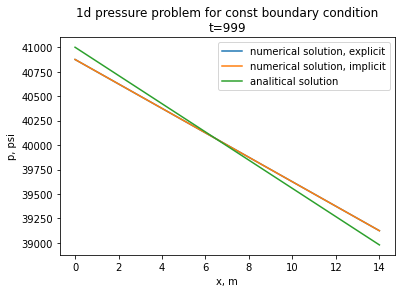

In [24]:
n_iter = int(1e3)
p_ex = np.ones((nx, 1)) * p_0
p_im = np.ones((nx, 1)) * p_0
t = 0
xs = list(np.linspace(0, nx-1, nx) * dx * 1.01)
for i in range(1, n_iter):
    p_ex += 1 / dt_coeff * (lapl.dot(p_ex) + q_tilde)
    p_im += 1 / dt_coeff * (q_tilde)
    p_im = np.linalg.inv(np.eye(nx) - 1 / dt_coeff * lapl).dot(p_im)
    t += dt
    p_analit = [accurate_solution(x, t, alpha_analit, (nx-1)*dx, p_0, p_1, p_2) / 6894. for x in xs]
    display.clear_output(wait=True)
    plt.plot(p_ex / 6894, label=f'numerical solution, explicit')
    plt.plot(p_im / 6894, label=f'numerical solution, implicit')
    plt.plot(p_analit, label=f'analitical solution')
    plt.xlabel('x, m')
    plt.ylabel('p, psi')
    plt.title(f'1d pressure problem for const boundary condition\nt={t}')
    plt.legend()
    plt.show()